# **Getting Started with NETS**

**NETS** is a vanilla Deep Learning framework, made using only **NumPy**.
This project was first introduced as an assignment I made at the [University of Oslo](https://www.uio.no/studier/emner/matnat/ifi/IN5400/) and [Stanford University](http://cs231n.stanford.edu/syllabus.html)
.
However, this project was recreated to make it *object-oriented like*.
**NETS** was highly inspired from [PyTorch](https://pytorch.org/) and [TensorFlow](https://www.tensorflow.org/)

Requirements :

- Numpy
- Json (Optional)
- Time (Optional)
- Pandas (Optional)
- Scipy (Optional)
- Scikit-Learn (Optional)

# 0. Set Up

Let's load the packages we need to run our tests:

In [1]:
import os
import random as rd
import numpy as np
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.style.use('seaborn-darkgrid')
# Change the font ?
font = {'size'   : 15}
plt.rc('font', **font)

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.append("../../")

In [3]:
# Let's fix the seed

SEED = 42
rd.seed(SEED)
np.random.seed(SEED)

# 1. Tensor

A tensor is multi-dimensional array, similar to NumPy arrays.
Their particularity is their capability to stock previous gradients and operations.
Their architecture was highly inspired from *PyTorch* documentation.

In *PyTorch*, you create tensors using the tensor built-in method ``tensor`` or use ``Tensor`` class directly (it is not recommended to instantiate a tensor this way however).
*Nets* does not have (yet) built-in functions, so you will need to use the ``Tensor`` class to create a tensor.


## 1.1. Basic operations

Tensors supports basic mathematical operations. All these operations are defined in the ``nets/ops.py`` module. Here is a list of operations currently supported:

- ``add`` which add to tensors (broadcasting is supported),
- ``subtract`` which subtract to tensors (broadcasting is supported),
- ``multiply`` which add to tensors with the same shape,
- ``dot`` which compute the dot product ``@`` of two matrices,
- ``exp`` which compute the element-wise exponentiation of a tensor.
- ``sum`` which sum up all elements in a tensor,
- ``transpose`` which transpose a tensor. 

In [4]:
import nets

t1 = nets.Tensor([[1, 3], 
                  [5, 7]])
t2 = nets.Tensor([[2, 4], 
                  [6, 8]])

print(f"t1 =\n{t1}")
print(f"t2 =\n{t2}")

print("\nSome basic operations")
print(f"t1 + t2: \n{t1 + t2}")
print(f"t1 - t2: \n{t1 - t2}")
print(f"t1 * t2: \n{t1 *t2}")
print(f"t1 @ t2: \n{t1 @ t2}")
print(f"t1 ** 2: \n{t1 ** 2}")
print(f"t1 / t2: \n{t1 / t2}")
print(f"t1 / 10: \n{t1 / 10}")

t1 =
Tensor([[1 3]
        [5 7]], <cpu>)
t2 =
Tensor([[2 4]
        [6 8]], <cpu>)

Some basic operations
t1 + t2: 
Tensor([[ 3  7]
        [11 15]], <cpu>)
t1 - t2: 
Tensor([[-1 -1]
        [-1 -1]], <cpu>)
t1 * t2: 
Tensor([[ 2 12]
        [30 56]], <cpu>)
t1 @ t2: 
Tensor([[20 28]
        [52 76]], <cpu>)
t1 ** 2: 
Tensor([[ 1  9]
        [25 49]], <cpu>)
t1 / t2: 
Tensor([[0.5    0.75  ]
        [0.8333 0.875 ]], <cpu>)
t1 / 10: 
Tensor([[0.1 0.3]
        [0.5 0.7]], <cpu>)


## 1.2. Gradients

*Nets* uses a custom *autograd* system, made with numpy.
Some vanilla architectures do not depends on this functionality however, like ``DNN`` networks.
All these information will be detailed in the model's section.

As you may have seen, there is a ``requires_grad`` set to ``False`` by default when we create a tensor.
This attribute attributes works similarly as **PyTorch**'s attribute. If set to ``True``,
previous gradients will be registered and saved in this tensor, in the ``_hooks`` attribute.
This attribute is basically a list containing all previous gradients.
That is, when calling the ``backward`` method on this tensor with an upstream gradient,
it will propagate through all previous gradients.

Let's see some basic examples:

In [5]:
t1 = nets.Tensor([1, 3], requires_grad=True)
t2 = nets.Tensor([2, 4], requires_grad=True)
 
# Some operations
t3 = t1 + t2 + 4
t4 = t3 * t2

print(f"t1 =\n{t1}")
print(f"t2 =\n{t2}")

print("\nOperation:")
print("t3 = t1 + t2 + 4")
print("t4 = t3 * t2")

print(f"\nt3 =\n{t3}")
print(f"t4 =\n{t4}")

print("\nBefore backpropagation")
print(f"t1 gradient: {t1.grad}")
print(f"t2 gradient: {t2.grad}")
print(f"t3 gradient: {t3.grad}")
print(f"t4 gradient: {t4.grad}")

# Upstream gradient
grad = nets.Tensor([-1, 2])

# Back-propagation
t4.backward(grad)

print("\nAfter backpropagation")
print(f"t1 gradient: {t1.grad}")
print(f"t2 gradient: {t2.grad}")
print(f"t3 gradient: {t3.grad}")
print(f"t4 gradient: {t4.grad}")

t1 =
Tensor([1 3], requires_grad=True, <cpu>)
t2 =
Tensor([2 4], requires_grad=True, <cpu>)

Operation:
t3 = t1 + t2 + 4
t4 = t3 * t2

t3 =
Tensor([ 7 11], requires_grad=True, <cpu>)
t4 =
Tensor([14 44], requires_grad=True, <cpu>)

Before backpropagation
t1 gradient: None
t2 gradient: None
t3 gradient: None
t4 gradient: None

After backpropagation
t1 gradient: Tensor([-2  8], requires_grad=True, <cpu>)
t2 gradient: Tensor([-9 30], requires_grad=True, <cpu>)
t3 gradient: Tensor([-2  8], requires_grad=True, <cpu>)
t4 gradient: Tensor([-1  2], <cpu>)


In [6]:
t4.is_leaf

False

# 2. Autograd

The backward pass is called for computing the gradients and create a computational graph from all previous operations. 
This backward pass can be called using the ``backward`` method of a ``Module``. 
In this case, you will need to write the computational on your own, as the gradients' equations depends on a model. 
This *Vanilla* back-propagation is implemented for standard models, like ``DNN``, ``CNN`` and ``RNN``.
However, you won't be able to mix them using this technique unless you change some parts of the ``backward`` method.

Or, you can use the *autograd* system. As ``Tensor`` keeps track of the computational graph in their ``hooks``, 
it is easier to compute the back-propagation. The back-propagation is decomposed in elementary operations (+, -, /, \*, exp) 
and the gradient given from a ``Loss`` function is then transferred through the computational graph.

## Example

With the backward pass, you can minimize any basic functions (functions that can be decomposed ito elementary operations). As the ``autograd`` system, record the gradients, you can determine the slope at this point and adjust your inputs by a coefficient, called learning rate $l_r$.

This is maybe a lot of information and a lot of text, so let's try to visualize how we can use gradients to minimize a function instead.

The function we will try to minimize is the so called *three hump camel* function:

$$
\forall x_1, x_2 \in \mathbb{R}, \quad f(x_1, x_2) = 2 x_1^2 - 1.05 x_1^4 + \frac{x_1^6}{6} + x_1 x_2 + x_2^2
$$

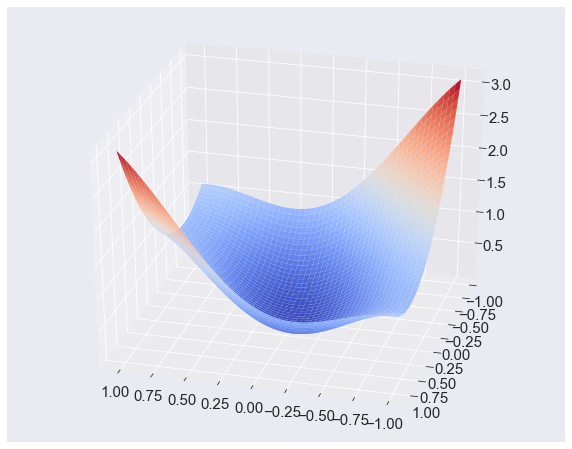

In [7]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data
camel = lambda x,y: (2*x**2 - 1.05*x**4 + ((x**6)/6) + x*y + y**2)
X = np.linspace(-1, 1, 100)
Y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(X, Y)
Z = camel(X, Y)

# Plot the surface
ax.view_init(30, 105)
ax.plot_surface(X, Y, Z, cmap='coolwarm', linewidth=0)

## 2.1. PyTorch implementation

In [8]:
import torch
from torch.autograd import Variable

# Random x points
data = rd.uniform(-1, 1)
x = torch.tensor(data, requires_grad=True)
# Random y points
data = rd.uniform(-1, 1)
y = torch.tensor(data, requires_grad=True)

# Wrap X, Y in Variable for autograd
x = Variable(x, requires_grad=True)
y = Variable(y, requires_grad=True)

# Learning rate
LR = 0.1
# Epochs
EPOCHS = 50

# Define the update rule
optimizer = torch.optim.SGD([x, y], lr=LR, momentum=0)

# Keep track of the loss
torch_history = []
torch_points_history = []

for i in range(1, EPOCHS+1):
    # The gradients accumulates, we need to clear that at each epochs
    optimizer.zero_grad()
    
    # outputs, can be seen as "predictions"
    z = camel(x, y)
    
    # Compute the loss (sum of all values)
    # As the minimum is at (0, 0), the lower the loss is, the closest we are to this minimum
    loss = z.sum()
    
    # Get the gradients
    loss.backward()
    
    # Update the points
    optimizer.step()

    # Add the loss to the history and display the current loss in the console
    torch_history.append(loss.item())
    torch_points_history.append((x.item(), y.item(), z.item()))
    print(f"\repoch: {i:4d} | loss: {loss.item():1.2E}", end="")

epoch:   50 | loss: 3.63E-08

## 2.2. NETS implementation

In [9]:
from nets.optim import SGD

# Random x points
data = rd.uniform(-1, 1)
xn = nets.Parameter(data)
# Random y points
data = rd.uniform(-1, 1)
yn = nets.Parameter(data)

# Now we have generated points (X, Y) randomly

# Learning rate
LR = 0.1
# Epochs
EPOCHS = 50

optimizer = SGD([xn, yn], lr=LR, momentum=0)

# Keep track of the loss
nets_history = []
nets_points_history = []

# Run the simulation 50 times
for i in range(1, EPOCHS+1):
    # The gradients accumulates, we need to clear that at each epochs
    optimizer.zero_grad()
    
    # outputs, can be seen as "predictions"
    zn = camel(xn, yn)
    
    # Compute the loss (sum of all values)
    # As the minimum is at (0, 0), the lower the loss is, the closest we are to this minimum
    loss = zn.sum()  # is a 0-tensor
    
    # Get the gradients
    loss.backward()
    
    # Update the points
    optimizer.step()
    
    # Add the loss to the history and display the current loss in the console
    nets_history.append(loss.item())
    nets_points_history.append((xn.item(), yn.item(), zn.item()))
    print(f"\repoch: {i:4d} | loss: {loss.item():1.2E}", end="")

epoch:   50 | loss: 3.61E-09

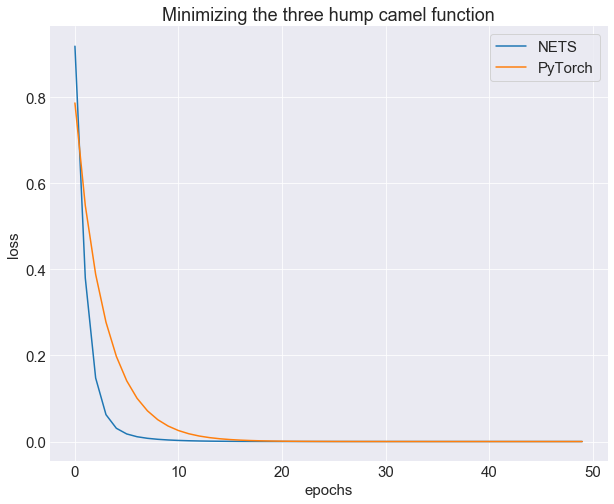

In [10]:
plt.plot(nets_history, label='NETS')
plt.plot(torch_history, label='PyTorch')
plt.title("Minimizing the three hump camel function")
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc=0, frameon=True)

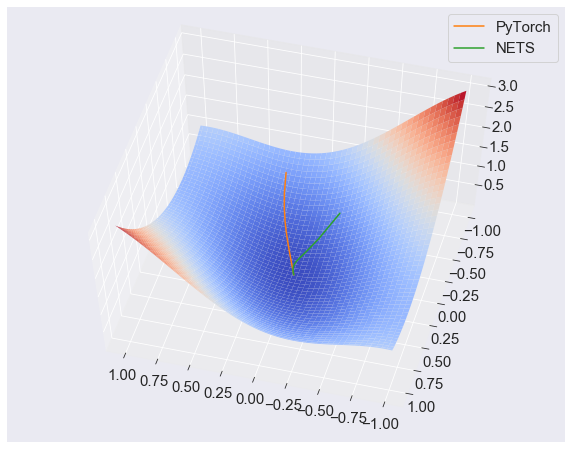

In [11]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot the surface
ax.view_init(60, 105)
ax.plot_surface(X, Y, Z, cmap='coolwarm', linewidth=0)

# Plot the history of the minimization process
x_torch, y_torch, z_torch = list(zip(*torch_points_history))
x_nets, y_nets, z_nets = list(zip(*nets_points_history))

ax.plot(x_torch, y_torch, z_torch, label="PyTorch")
ax.plot(x_nets, y_nets, z_nets, label="NETS")
#Plot a legend
plt.legend(loc=1, frameon=True)

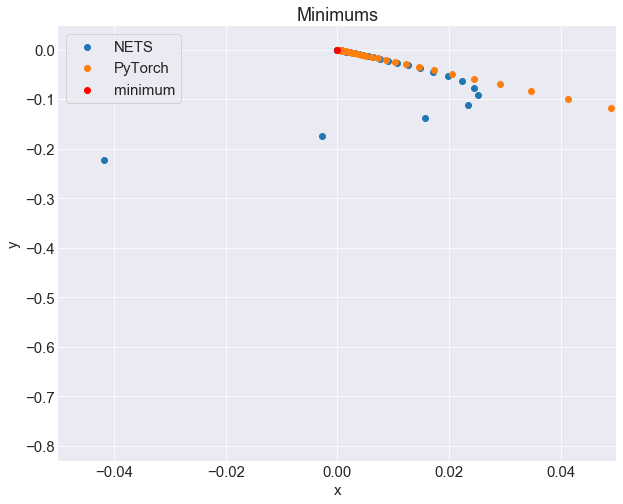

In [12]:
plt.scatter(x_nets, y_nets, label='NETS')
plt.scatter(x_torch, y_torch, label='PyTorch')
plt.scatter(0, 0, color='r', label='minimum')
plt.title("Minimums")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-0.05, 0.05)
plt.xlim(-0.05, 0.05)
plt.legend(frameon=True)

The minimums found are all located close to $(0, 0)$, which is the global minimum of $f$. It worked !

# 3. Build a model

A model is a ``Module``subclass, where biases, weights and parameters transformations are computed. All modules have a ``forward`` method, that MUST be overwritten. This method will compute the forward propagation from an input tensor, and compute the transformation. If using the ``autograd`` system, no back-propagation need to be added. However, if you prefer to manually compute the gradients, you will need to override the ``backward`` method.

## 3.1. Sequential

There are two approaches when it comes to building a model. The first one, maybe the less convenient, is to use the ``Sequential`` class or ``add`` method. When building a sequential model, the ``forward`` pass is just a succession of inner forward loops. For example, if we have objects that have 10 *attributes* and we want to classify them in 5 classes, we can try the following model:

```
Linear(10, 100) -> Tanh() -> Linear(100, 100) -> Tanh() -> Linear(100, 5)
```

the forward pass will call the ``forward`` method of:

- Linear(10, 100),
- Tanh(),
- Linear(100, 100),
- Tanh(),
- Linear(100, 5)

In [13]:
import nets.nn as nn

#Build a sequential model
model = nn.Sequential(nn.Linear(10, 100),
                      nn.Tanh(),
                      nn.Linear(100, 100),
                      nn.Tanh(),
                      nn.Linear(100, 5))

# Let's check the architecture
model

Sequential(
   (0): Linear(input_dim=10, output_dim=100, bias=True)
   (1): Tanh()
   (2): Linear(input_dim=100, output_dim=100, bias=True)
   (3): Tanh()
   (4): Linear(input_dim=100, output_dim=5, bias=True)
)

You can of course add manually a module to an existing model using ``add``:

In [14]:
model.add(nn.Tanh(), nn.Linear(5, 5))

# Let's check the architecture
model

Sequential(
   (0): Linear(input_dim=10, output_dim=100, bias=True)
   (1): Tanh()
   (2): Linear(input_dim=100, output_dim=100, bias=True)
   (3): Tanh()
   (4): Linear(input_dim=100, output_dim=5, bias=True)
   (5): Tanh()
   (6): Linear(input_dim=5, output_dim=5, bias=True)
)

## 3.2. Class Instance

The second initialization is the most popular (used by **PyTorch** and **TensorFlow**). It consists by creating a ``Model`` class that inherits from ``Module`` and override the ``forward`` pass.

In [15]:
import nets
import nets.nn as nn

class Model(nn.Module):
    """
    Create your own model.
    The attributes should be the submodel used during the forward pass.
    You don't have to necessary affect the activation function, unless you want to set a manual backward pass.
    """
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        # Initialization
        
        super().__init__()               # Don't forget to add this line
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, hidden_dim)
        self.layer3 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, inputs):
        # Forward pass
        
        out1 = nets.tanh(self.layer1(inputs))
        out2 = nets.tanh(self.layer2(out1))
        return self.layer3(out2)
    
model = Model(10, 100, 5)

# Let's check the architecture
model

Model(
   (layer1): Linear(input_dim=10, output_dim=100, bias=True)
   (layer2): Linear(input_dim=100, output_dim=100, bias=True)
   (layer3): Linear(input_dim=100, output_dim=5, bias=True)
)

# 4. Forward pass

As seen before, the ``forward`` pass is essential to compute the predicted classes to solve a problem. For an input tensor, the first index should corresponds to the ``BATCH_SIZE`` $N$ and the second to the ``input_dim`` dimension. The result is a tensor of shape $(N, C)$ where $C$ stands for the number of classes (``output_dim`` in the previous model).

In [16]:
# Build inputs tensor
# The data is between [-10, 10]

BATCH_SIZE = 50
data = (np.random.rand(BATCH_SIZE, 10) * 20 - 10)
inputs = nets.Tensor(data)

print(f'data shape: {inputs.shape}')

data shape: (50, 10)


In [17]:
predictions = model.forward(inputs)

print(f"predictions' shape: {predictions.shape}")

predictions' shape: (50, 5)


# 5. All together

## Example: XOR

Let's try to solve the XOR problem. This problem consist to classify two classes distributed as follow:

![XOR](../../img/xor.png)

This distribution **is not linearly separable**, so we will need non-linearity transformations in our model to be able to correctly classify each elements.

## 5.1. Generating the data

In [18]:
# [1, 1] quarter
d1 = np.random.rand(50, 2)
# [-1, -1] quarter
d2 = (np.random.rand(50, 2) - 1)
# Labels
l1 = np.ones(len(d1) + len(d2))
l1 = np.column_stack((l1, np.zeros(len(d1) + len(d2))))

# [-1, 1] quarter
d3 = np.random.rand(50, 2)
d3[:,0] -= np.ones(50)
# [1, -1] quarter
d4 = np.random.rand(50, 2)
d4[:,1] -= np.ones(50)
# Labels
l2 = np.zeros(len(d3) + len(d4))
l2 = np.column_stack((l2, np.ones(len(d1) + len(d2))))


# All the data
data = nets.Tensor(np.concatenate((d1, d2, d3, d4)))
labels = np.concatenate((l1, l2)).astype(int)
# labels = np.argmax(labels, axis=1)
labels = nets.Tensor(labels)
# And all labels :
# [1, 0] one hot encoded: 0 -> blue
# [0, 1] one hot encoded: 1 -> red

print(f"data shape: {data.shape}")
print(f"labels shape: {labels.shape}")

data shape: (200, 2)
labels shape: (200, 2)


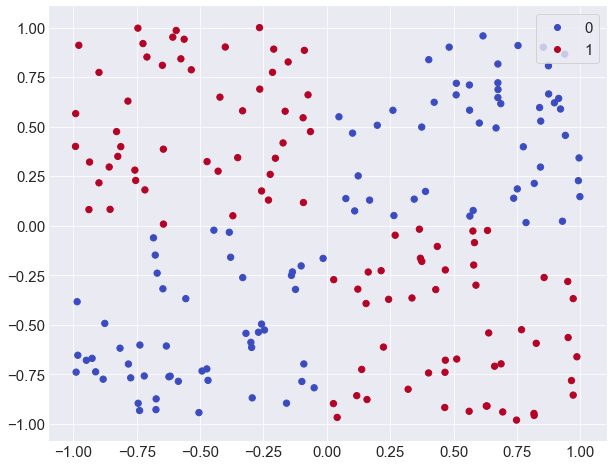

In [19]:
scatter = plt.scatter(data.data[:,0], data.data[:,1], s=40, c=np.argmax(labels.data, axis=1), cmap='coolwarm')
plt.legend(*scatter.legend_elements(), loc=1, frameon=True)

## 5.2. Building a model

In [20]:
class XOR(nn.Module):

    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()               
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, hidden_dim)
        self.layer3 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, inputs):
        # Forward pass
        
        out1 = nets.tanh(self.layer1(inputs))
        out2 = nets.tanh(self.layer2(out1))
        return self.layer3(out2)
    
model = XOR(2, 10, 2)

# Let's check the architecture
model

XOR(
   (layer1): Linear(input_dim=2, output_dim=10, bias=True)
   (layer2): Linear(input_dim=10, output_dim=10, bias=True)
   (layer3): Linear(input_dim=10, output_dim=2, bias=True)
)

## 5.3. Criterion & Optimizer

In [21]:
from nets.optim import SGD, Adam, RMSprop
from nets.nn import CrossEntropyLoss, MSELoss
from nets.nn.utils import one_hot

# How much do we update the parameters
LEARNING_RATE = 0.01

optimizer = Adam(model.parameters(), lr=LEARNING_RATE)
criterion = CrossEntropyLoss()

## 5.4. Training

In [22]:
EPOCHS = 1000

history = []
for epoch in range(1, EPOCHS+1):
    # Gradients accumulates, therefore we need to set them to zero at each iteration
    model.zero_grad()
    # Predictions
    predictions = model(data)
    loss = criterion(predictions, labels)
    # Compute the gradient
    loss.backward()
    # Update the parameters
    optimizer.step()
    # Record the loss for plotting
    history.append(loss.item())
    print(f"\repoch: {epoch} | loss: {loss.item():1.3E}", end="")

epoch: 1000 | loss: 1.317E-03

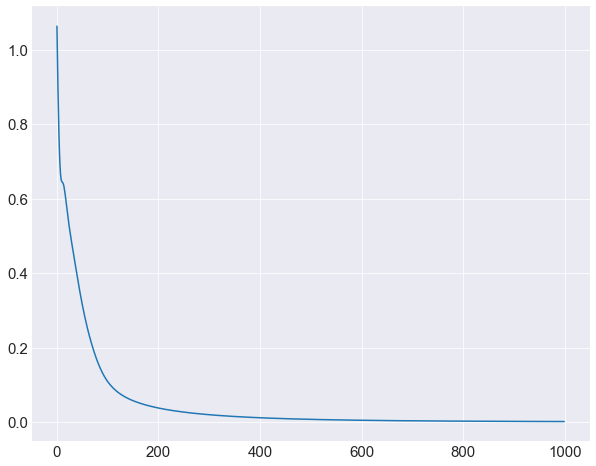

In [23]:
plt.plot(history)

## 5.5. Testing

Again, we need to generate randomly unseen data (testing data).

In [24]:
# [1, 1] quarter
d1 = np.random.rand(50, 2)
# [-1, -1] quarter
d2 = (np.random.rand(50, 2) - 1)
# Labels
l1 = np.ones(len(d1) + len(d2))
l1 = np.column_stack((l1, np.zeros(len(d1) + len(d2))))

# [-1, 1] quarter
d3 = np.random.rand(50, 2)
d3[:,0] -= np.ones(50)
# [1, -1] quarter
d4 = np.random.rand(50, 2)
d4[:,1] -= np.ones(50)
# Labels
l2 = np.zeros(len(d3) + len(d4))
l2 = np.column_stack((l2, np.ones(len(d1) + len(d2))))

# Concatenate the data in a 2D big tensor
data = nets.Tensor(np.concatenate((d1, d2, d3, d4)))
labels = nets.Tensor(np.concatenate((l1, l2)).astype(int))

print(f"data shape: {data.shape}")
print(f"labels shape: {labels.shape}")

data shape: (200, 2)
labels shape: (200, 2)


In [25]:
# Gradients accumulates, therefore we need to set them to zero at each iteration
model.zero_grad()
# Predictions
predictions = model(data)
loss = criterion(predictions, labels)

pred_classes = np.argmax(predictions.data, axis=1)
labels = np.argmax(labels.data, axis=1)

accuracy = (pred_classes == labels).astype(float).sum() / 200
print(f'accuracy: {accuracy.item() * 100:2.2f}%')

accuracy: 99.00%


## 5.6. Boundary decision

In [26]:
print("Sanity check")
print(f"data shape: {data.shape}")
print(f"labels shape: {labels.shape}")

Sanity check
data shape: (200, 2)
labels shape: (200,)


In [27]:
def predict(x):
    # Convert into numpy element to Tensor
    x = nets.Tensor(x)
    # Predict and return the class index
    pred = model.forward(x)
    pred_classes = np.argmax(pred.data, axis=1)
    return pred_classes

In [28]:
def plot_decision_boundary(pred_func, X, y):
    # Set min and max values for the bbox
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy=np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.subplots()
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
    plt.legend(*scatter.legend_elements(), loc=1, frameon=True)

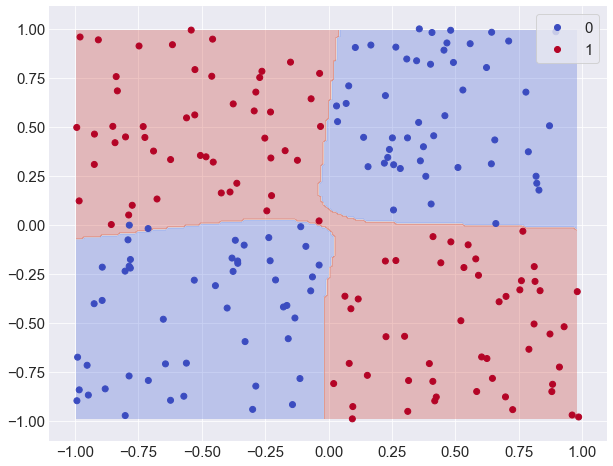

In [29]:
plot_decision_boundary(lambda x : predict(x), data.data, labels)

# Save the figure
# plt.tight_layout()
# plt.savefig("xor_classification.png")

 We have seen the main functionalities of **NETS** and how to set up a model and use one.
 
 There will be more tutorials on how to build such library from scratch, and other use cases with **CNN** and **RNN**.